In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
train=pd.read_csv("titanic_train.csv")
test=pd.read_csv("titanic_test.csv")

In [185]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [186]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [187]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Null values are there in Age and Cabin

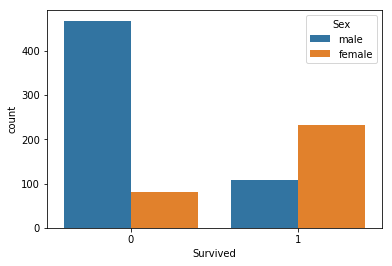

In [188]:
sns.countplot(x="Survived",hue="Sex",data=df)

In [ ]:
#Death rate of males is more than females

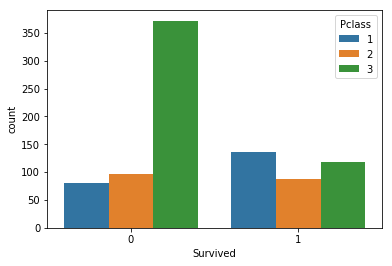

In [189]:
sns.countplot(x="Survived",hue="Pclass",data=df)

In [ ]:
#Death rate of people in class 3 is high


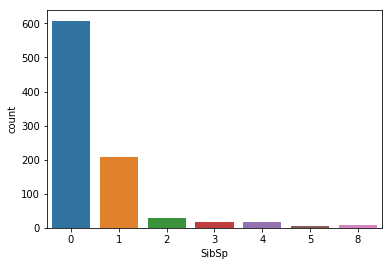

In [190]:
sns.countplot(x="SibSp",data=df)

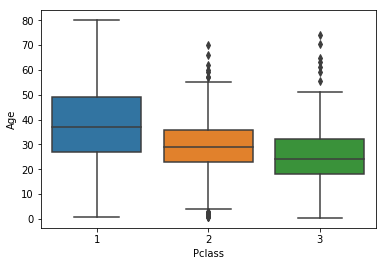

In [191]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [ ]:
#To fill the null values in Age we need to replce them with new values.
#We replace age for people in respective class with their respective means in a class

In [192]:
train[["Pclass","Age"]].groupby(["Pclass"],as_index=False).mean()

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [193]:
def age_replacing(cols):
    Age=cols[0]
    Pclass=cols[1]
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 38
        elif(Pclass==2):
            return 30
        elif(Pclass==3):
            return 25
    else:
        return Age    

In [194]:
#Replacing null values from age

In [195]:
train["Age"]=train[["Age","Pclass"]].apply(age_replacing,axis=1)
test["Age"]=test[["Age","Pclass"]].apply(age_replacing,axis=1)

In [196]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [197]:
#Since cabin is not required we can drop it
train.drop("Cabin",axis=1,inplace=True)
test.drop("Cabin",axis=1,inplace=True)

In [198]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [ ]:
#Turning Categorical values such as "Sex" and "Embarked" into quantitative variables

In [199]:
sex_train=pd.get_dummies(train["Sex"])
sex_test=pd.get_dummies(test["Sex"])

In [200]:
train=pd.concat([train,sex_train],axis=1)
test=pd.concat([test,sex_test],axis=1)

In [201]:
train.drop(["Sex"],axis=1,inplace=True)
test.drop(["Sex"],axis=1,inplace=True)

In [202]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,S,0,1


In [ ]:
#Turning Categorical for test data

In [203]:
embark_train=pd.get_dummies(train["Embarked"])
embark_test=pd.get_dummies(test["Embarked"])

In [204]:
train=pd.concat([train,embark_train],axis=1)
test=pd.concat([test,embark_test],axis=1)

In [205]:
train.drop(["Embarked"],axis=1,inplace=True)
test.drop(["Embarked"],axis=1,inplace=True)

In [206]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


In [ ]:
#Since passengerID ,Name,Ticket is not required we drop it

In [207]:
train.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [208]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1


In [209]:
name=test["Name"]
indices=test["PassengerId"]
test.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [210]:
test.head(3)

,Unnamed: 0,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,34.5,0,0,7.8292,0,1,0,1,0
1,1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,2,62.0,0,0,9.6875,0,1,0,1,0


In [211]:
#Data is ready

In [212]:
x=train[["Pclass","Age","SibSp","Parch","Fare","female","male","C","Q","S"]]


In [213]:
from sklearn.linear_model import LogisticRegression

In [214]:
LR=LogisticRegression()

In [215]:
LR.fit(x,train["Survived"])

C:\Users\vedant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [220]:
test.drop(["Unnamed: 0"],axis=1,inplace=True)

In [217]:
train.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.25,0,1,0,0,1


In [221]:
answers=LR.predict(test)

In [226]:
answers

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [238]:
answers_df=pd.DataFrame(answers)
answers_df.rename(columns={0:"Survived"},inplace=True)


In [240]:
answers_df.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [230]:
name_df=pd.DataFrame(name)

In [241]:
name_df.head()

,Name
0,"Kelly, Mr. James"
1,"Wilkes, Mrs. James (Ellen Needs)"
2,"Myles, Mr. Thomas Francis"
3,"Wirz, Mr. Albert"
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"


In [244]:
predicted=pd.concat([name_df,answers_df],axis=1)

In [245]:
predicted

,Name,Survived
0,"Kelly, Mr. James",0
1,"Wilkes, Mrs. James (Ellen Needs)",0
2,"Myles, Mr. Thomas Francis",0
3,"Wirz, Mr. Albert",0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1
5,"Svensson, Mr. Johan Cervin",0
6,"Connolly, Miss. Kate",1
7,"Caldwell, Mr. Albert Francis",0
8,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1
9,"Davies, Mr. John Samuel",0


In [246]:
predicted.to_csv("TitanicSurvivors.csv")